In [24]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
print(tf.__version__)

2.12.0


In [32]:
#import os
#for dirname, _, filenames in os.walk('/FoodRecognitionDataset'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

import os

# Specify the relative path to the directory
directory = 'FoodRecognitionDataset'

# Iterate over the files in the directory
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)


FoodRecognitionDataset\test\Apple\100214013-red-apple-with-dots-in-close-up-view.jpg
FoodRecognitionDataset\test\Apple\133908365-bright-apple-on-a-white-background.jpg
FoodRecognitionDataset\test\Apple\1x.jpg
FoodRecognitionDataset\test\Apple\220_F_320398505_k0sHJERagsO5bqPUrQAChjXhSI5urLzR.jpg
FoodRecognitionDataset\test\Apple\292.jpg
FoodRecognitionDataset\test\Apple\440.jpg
FoodRecognitionDataset\test\Apple\446.jpg
FoodRecognitionDataset\test\Apple\518.jpg
FoodRecognitionDataset\test\Apple\8248546-apple-stack.jpg
FoodRecognitionDataset\test\Apple\93.jpg
FoodRecognitionDataset\test\Apple\apple-collection-isolated-white-background-clipping-path-94081347.jpg
FoodRecognitionDataset\test\Apple\apples-background.jpg
FoodRecognitionDataset\test\Apple\apples-ed_3351237b.jpg
FoodRecognitionDataset\test\Apple\apples-wooden-board-210227389.jpg
FoodRecognitionDataset\test\Apple\big-middle-small-fresh-red-apples-isolated-white-background-different-sized-apples_259229-192.jpg
FoodRecognitionDatas

In [60]:
# Create a list with the filepaths for training
train_dir = Path('FoodRecognitionDataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [61]:
# Create a list with the filepaths for testing
test_dir = Path('FoodRecognitionDataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [62]:
# Create a list with the filepaths for validation
val_dir = Path('FoodRecognitionDataset/validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [71]:
def image_processing(filepaths):
    # Create a Dataframe with the filepath and the labels of the pictures
    labels = [str(filepath).split(os.path.sep)[-2]
              for filepath in filepaths]
    filepath = pd.Series(filepaths, name= 'Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Suffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [72]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [73]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 5003

Number of different labels: 50

Labels: ['Potato' 'Nut' 'Cookie' 'Butter' 'Lemon' 'Guava' 'Noodles' 'Dosa' 'Honey'
 'Papaya' 'Watermelon' 'Apple' 'Cake' 'Tomato' 'Donuts' 'Bread' 'Chapati'
 'Banana' 'Dates' 'Biryani' 'Chicken' 'Pizza' 'Egg' 'Strawberry' 'Jelebi'
 'Waffle' 'Fish' 'Grapes' 'Burger' 'Sausages' 'Jackfruit' 'Chips'
 'Coconut' 'Pasta' 'Hot dog' 'Rice' 'Ice cream' 'Pineapple' 'French-fries'
 'Oranges' 'Mango' 'Milk' 'Salad' 'Seafood' 'Beef' 'Dragon fruit' 'Carrot'
 'Sandwich' 'Kabab' 'Durian']


In [74]:
train_df.head(10)

,Filepath,Label
0,FoodRecognitionDataset\train\Potato\240_F_4129...,Potato
1,FoodRecognitionDataset\train\Potato\download (...,Potato
2,FoodRecognitionDataset\train\Nut\istockphoto-9...,Nut
3,FoodRecognitionDataset\train\Cookie\download (...,Cookie
4,FoodRecognitionDataset\train\Butter\images (16...,Butter
5,FoodRecognitionDataset\train\Lemon\images (2).jpg,Lemon
6,FoodRecognitionDataset\train\Guava\images (89)...,Guava
7,FoodRecognitionDataset\train\Noodles\spaghetti...,Noodles
8,FoodRecognitionDataset\train\Dosa\images (46).jpg,Dosa
9,FoodRecognitionDataset\train\Honey\132.jpg,Honey


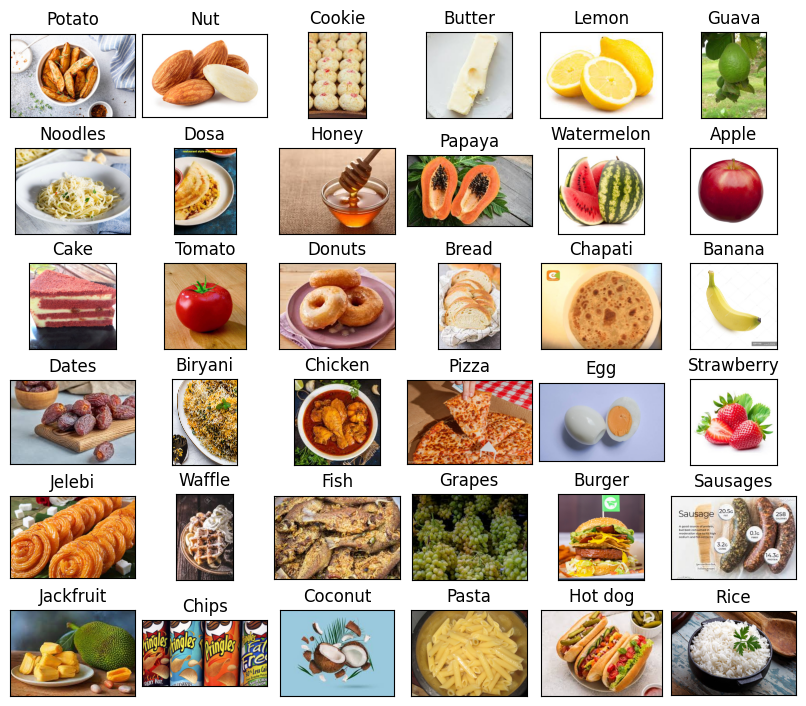

In [75]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset = ["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate (axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout (pad=0.5)
plt.show()

In [76]:
# Image processing
train_generator = tf.keras.preprocessing. image. ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

test_generator = tf.keras.preprocessing.image. ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [81]:
train_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col= 'Filepath',
    y_col= 'Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed= 0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.15,
    horizontal_flip= True,
    fill_mode= "nearest"
)

Found 5003 validated image filenames belonging to 50 classes.


In [82]:
val_images = train_generator.flow_from_dataframe(
    dataframe = val_df,
    x_col= 'Filepath',
    y_col= 'Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed= 0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.15,
    horizontal_flip= True,
    fill_mode= "nearest"
)

Found 5003 validated image filenames belonging to 50 classes.


In [83]:
test_images = train_generator.flow_from_dataframe(
    dataframe = test_df,
    x_col= 'Filepath',
    y_col= 'Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed= 0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range= 0.15,
    horizontal_flip= True,
    fill_mode= "nearest"
)

Found 5003 validated image filenames belonging to 50 classes.


In [84]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape= (224, 224, 3),
    include_top= False,
    weights= 'imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [86]:
inputs = pretrained_model.input
x= tf.keras.layers.Dense(128, activation='relu') (pretrained_model.output)
x= tf.keras.layers.Dense(128, activation='relu')(x)

num_classes = 50
outputs = tf.keras.layers.Dense(num_classes, activation='softmax') (x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
157/157 [==============================] - 197s 1s/step - loss: 1.7049 - accuracy: 0.5834 - val_loss: 0.5262 - val_accuracy: 0.8575
Epoch 2/5
157/157 [==============================] - 193s 1s/step - loss: 0.4618 - accuracy: 0.8719 - val_loss: 0.2356 - val_accuracy: 0.9448
Epoch 3/5
157/157 [==============================] - 192s 1s/step - loss: 0.2367 - accuracy: 0.9362 - val_loss: 0.1396 - val_accuracy: 0.9656
Epoch 4/5
157/157 [==============================] - 190s 1s/step - loss: 0.1250 - accuracy: 0.9724 - val_loss: 0.0751 - val_accuracy: 0.9856
Epoch 5/5
157/157 [==============================] - 191s 1s/step - loss: 0.0596 - accuracy: 0.9900 - val_loss: 0.0305 - val_accuracy: 0.9978


In [88]:
# Predict the label of the test images
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)

#Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k, v in labels.items()) 
pred1 = [labels[k] for k in pred]
pred1

157/157 [==============================] - 93s 587ms/step


['Donuts',
 'Jelebi',
 'Fish',
 'Waffle',
 'Lemon',
 'Dosa',
 'Bread',
 'Butter',
 'Cookie',
 'Seafood',
 'Nut',
 'Papaya',
 'Chapati',
 'Grapes',
 'Fish',
 'Hot dog',
 'Chapati',
 'Noodles',
 'Kabab',
 'Salad',
 'Tomato',
 'Potato',
 'Hot dog',
 'Rice',
 'Sandwich',
 'Potato',
 'Egg',
 'Jelebi',
 'Jelebi',
 'Fish',
 'Pizza',
 'Grapes',
 'Seafood',
 'Egg',
 'Dates',
 'Durian',
 'Grapes',
 'Egg',
 'Butter',
 'Dosa',
 'Pizza',
 'Lemon',
 'Guava',
 'Egg',
 'Kabab',
 'Grapes',
 'Noodles',
 'Grapes',
 'Pasta',
 'Egg',
 'Jackfruit',
 'Bread',
 'Tomato',
 'Nut',
 'Strawberry',
 'Durian',
 'Pineapple',
 'Strawberry',
 'Cake',
 'Oranges',
 'Fish',
 'Chapati',
 'Dates',
 'Banana',
 'Durian',
 'Lemon',
 'Sausages',
 'Beef',
 'Bread',
 'Milk',
 'Carrot',
 'Pasta',
 'Egg',
 'Papaya',
 'Ice cream',
 'Apple',
 'Donuts',
 'Tomato',
 'Egg',
 'Kabab',
 'Salad',
 'Strawberry',
 'Burger',
 'Pineapple',
 'Burger',
 'French-fries',
 'Watermelon',
 'Guava',
 'Dosa',
 'Donuts',
 'Chicken',
 'Milk',
 'Honey',


In [89]:
def output(location):
    img = load_img(location, target_size=(224,224,3))
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims (img, [0])
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels [y]
    return res

In [106]:
import cv2
#img = output('FoodRecognitionDataset\\test\\Nut\\images (8).jpg')
#img
img = output('FoodRecognitionDataset\\test\\Nut\\istockphoto-153712278-612x612.jpg')
img

1/1 [==============================] - 0s 61ms/step


'Nut'

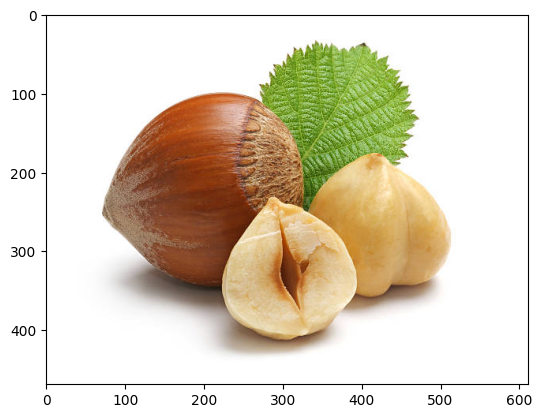

In [101]:
import cv2
img = cv2.imread(os.path.join('FoodRecognitionDataset\\test\\Nut\\istockphoto-153712278-612x612.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [108]:
# Save as .h5 model
model.save('FR_FYP.h5')

In [114]:
# Load the .h5 model
model = tf.keras.models.load_model('FR_FYP.h5')

In [117]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("FR_FYPmodel.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\GADGET~1\AppData\Local\Temp\tmpf71sxvt5\assets


INFO:tensorflow:Assets written to: C:\Users\GADGET~1\AppData\Local\Temp\tmpf71sxvt5\assets
